In [118]:
import pandas as pd
import difflib
from difflib import SequenceMatcher
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import seaborn as sns


In [119]:
extracted_meals = pd.DataFrame({
    'name': ['schnitzel', 'cereals'],
    'amount': ['1', '1'],
    'unit': ['piece', 'bowl'],
})

extracted_meals.iloc[0]['name']

'schnitzel'

In [125]:
nutrition_dataset = pd.read_csv('../data/nutrition_dataset.csv')

food_names = nutrition_dataset['name'].tolist()

len(food_names), food_names[:5], nutrition_dataset['name'].isna().sum()

/var/folders/yn/kx4gh2414_q2phcdl6vwqdh40000gn/T/ipykernel_78182/942940539.py:1: DtypeWarning: Columns (4,5,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_dataset = pd.read_csv('../data/nutrition_dataset.csv')


(558423,
 ['spinach stromboli',
  'caesar salad',
  'large , pepperoni bacon , normal crust',
  'cheese stick per web site',
  'garlic dipping cup'],
 0)

## Find matches

In [103]:
def closest_matches(meal_name: str):
    def similar(a, b):
        return SequenceMatcher(None, a, b).ratio()

    matches = difflib.get_close_matches(meal_name, food_names, n=50, cutoff=0.6)

    if len(matches) == 0:
        return None

    return [{ 'name': x, 'similarity': similar(x, meal_name) } for x in matches]

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.strip()
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(word, pos = "n") for word in tokens]
    return ' '.join(tokens)

meal = clean_text("Schnitzel")

matches = closest_matches(meal)

print("Matches in databse")
print(len(matches), matches)

matches = [x['name'] for x in matches]

print("Matches in dataset")
matches_df = nutrition_dataset[nutrition_dataset['name'].isin(matches)]
matches_df.sort_values('grams_per_portion')

Matches in databse
16 [{'name': 'schnitzel', 'similarity': 1.0}, {'name': 'putenschnitzel', 'similarity': 0.782608695652174}, {'name': 'weinerschnitzel', 'similarity': 0.75}, {'name': 'vegan schnitzel', 'similarity': 0.75}, {'name': 'small schnizel', 'similarity': 0.6956521739130435}, {'name': 'schweineschnitzel', 'similarity': 0.6923076923076923}, {'name': 'schweineschnitzel', 'similarity': 0.6923076923076923}, {'name': 'chicken schnitzel', 'similarity': 0.6923076923076923}, {'name': 'schnitzel sandwich', 'similarity': 0.6666666666666666}, {'name': 'schnitzel sandwich', 'similarity': 0.6666666666666666}, {'name': 'chicken snitzel', 'similarity': 0.6666666666666666}, {'name': 'chicken snitzel', 'similarity': 0.6666666666666666}, {'name': 'aufschnitt', 'similarity': 0.631578947368421}, {'name': 'tunfisch schnitzel l', 'similarity': 0.6206896551724138}, {'name': 'chanterelle', 'similarity': 0.6}, {'name': 'beef schnitzel - meat', 'similarity': 0.6}]
Matches in dataset


,original_name,name,brand,calories,fats,carbohydrates,proteins,amount,original_unit,unit,calories_per_portion,grams_per_portion,calories_per_gram
45008,wurstwaren - aufschnitt,aufschnitt,wurstwaren,52.0,5.0,0.0,3,20.0,g,g,NaN,20.0,2.600000
59695,mushroom - chanterelle,chanterelle,mushroom,38.0,1.0,7.0,2,100.0,g,g,NaN,100.0,0.380000
158640,mama off - small schnizel,small schnizel,mama off,272.0,16.0,19.0,16,100.0,g,g,NaN,100.0,2.720000
319067,schnitzel - schweineschnitzel,schweineschnitzel,schnitzel,237.0,11.0,14.0,21,100.0,g,g,NaN,100.0,2.370000
446179,la perla - tunfisch schnitzel in l,tunfisch schnitzel l,la perla,304.0,25.0,0.0,20,125.0,g,g,NaN,125.0,2.432000
7810,bioland - putenschnitzel,putenschnitzel,bioland,141.0,1.0,0.0,32,134.0,g,g,NaN,134.0,1.052239
535628,schnitzel - schweineschnitzel,schweineschnitzel,schnitzel,356.0,16.0,21.0,31,150.0,g,g,NaN,150.0,2.373333
59821,wiener schnitzel - schnitzel,schnitzel,wiener schnitzel,376.0,18.0,12.0,40,200.0,gram,g,NaN,200.0,1.880000
449715,fresh - beef schnitzel - meat only,beef schnitzel - meat,fresh,372.0,12.0,0.0,61,200.0,g,g,NaN,200.0,1.860000
192114,ingham - chicken schnitzel,chicken schnitzel,ingham,438.0,18.0,36.0,32,225.0,grams,g,NaN,225.0,1.946667


In [117]:
matches_df['calories_per_gram'].iloc[10]

2.37

In [108]:
matches_df['calories_per_portion'].mean()
#matches_df['calories_per_gram'].mean()

TypeError: can only concatenate str (not "int") to str

## TODO: Split two groups: With matching unit and without

## TODO: Scale the ones without matching unit

## Remove outliers

<Axes: xlabel='Cals Per Unit', ylabel='Count'>

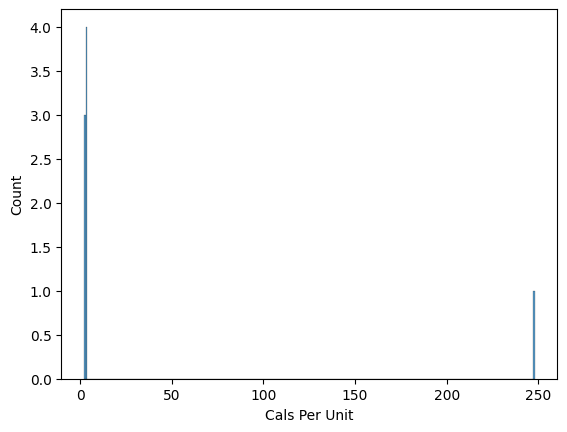

In [78]:
sns.histplot(matches_df['Cals Per Unit'])

In [94]:
# Here I will try to determine, whether it is a small, medium or large portion

# We assume the customer provided 200g Schnitzel
amount = 200
unit = 'g'
is_base_unit = True # TODO: We need a function for this

# TODO: This approach requires us to recalculate all dataset from ounces, tbsp, etc. to grams

gram_mask = matches_df['Amount'] >= 10
items_with_grams = matches_df[gram_mask]
#items_with_grams['Calories']

grams_amounts = items_with_grams['Amount']
grams_per_portion = grams_amounts.mean()

items_without_grams = matches_df[~gram_mask]
items_without_grams['Cals Per Unit'] / grams_per_portion

#matches_df

#gram_amounts.mean(), gram_amounts.std()


531271    1.720515
Name: Cals Per Unit, dtype: float64

In [80]:
matches_df

# We see some items with very low and with very high calories. We want to get rid of them.

,Name,Meal,Meal_cleaned,Brand,Calories,Fat,Carbs,Protein,Amount,Units,Cals Per Unit
7865,bioland - putenschnitzel,putenschnitzel,putenschnitzel,bioland,141,1.0,0.0,32,134.0,g,2.0
59888,wiener schnitzel - schnitzel,schnitzel,schnitzel,wiener schnitzel,376,18.0,12.0,40,200.0,gram,2.0
158814,mama off - small schnizel,small schnizel,small schnizel,mama off,272,16.0,19.0,16,100.0,g,3.0
319296,schnitzel - schweineschnitzel,schweineschnitzel,schweineschnitzel,schnitzel,237,11.0,14.0,21,100.0,g,3.0
446428,la perla - tunfisch schnitzel in l,tunfisch schnitzel in l,tunfisch schnitzel l,la perla,304,25.0,0.0,20,125.0,g,3.0
449964,fresh - beef schnitzel - meat only,beef schnitzel - meat only,beef schnitzel - meat,fresh,372,12.0,0.0,61,200.0,g,2.0
531271,crumbed chicken - chicken snitzel,chicken snitzel,chicken snitzel,crumbed chicken,248,14.0,21.0,9,1.0,snitzel,248.0
536020,schnitzel - schweineschnitzel,schweineschnitzel,schweineschnitzel,schnitzel,356,16.0,21.0,31,150.0,g,3.0


In [73]:
matches_df['Calories'].std(), matches_df['Calories'].mean()

(256.96212431666527, 332.25)

In [77]:
# Remove outliers
low = matches_df['Calories'].quantile(0.1)
high = matches_df['Calories'].quantile(0.9)
outliers = matches_df[(matches_df['Calories'] < low) | (matches_df['Calories'] > high)]
matches_df.drop(outliers.index, inplace=True)

print(matches_df.shape[0])
matches_df

8


/var/folders/yn/kx4gh2414_q2phcdl6vwqdh40000gn/T/ipykernel_78182/3964356216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df.drop(outliers.index, inplace=True)


,Name,Meal,Meal_cleaned,Brand,Calories,Fat,Carbs,Protein,Amount,Units,Cals Per Unit
7865,bioland - putenschnitzel,putenschnitzel,putenschnitzel,bioland,141,1.0,0.0,32,134.0,g,2.0
59888,wiener schnitzel - schnitzel,schnitzel,schnitzel,wiener schnitzel,376,18.0,12.0,40,200.0,gram,2.0
158814,mama off - small schnizel,small schnizel,small schnizel,mama off,272,16.0,19.0,16,100.0,g,3.0
319296,schnitzel - schweineschnitzel,schweineschnitzel,schweineschnitzel,schnitzel,237,11.0,14.0,21,100.0,g,3.0
446428,la perla - tunfisch schnitzel in l,tunfisch schnitzel in l,tunfisch schnitzel l,la perla,304,25.0,0.0,20,125.0,g,3.0
449964,fresh - beef schnitzel - meat only,beef schnitzel - meat only,beef schnitzel - meat,fresh,372,12.0,0.0,61,200.0,g,2.0
531271,crumbed chicken - chicken snitzel,chicken snitzel,chicken snitzel,crumbed chicken,248,14.0,21.0,9,1.0,snitzel,248.0
536020,schnitzel - schweineschnitzel,schweineschnitzel,schweineschnitzel,schnitzel,356,16.0,21.0,31,150.0,g,3.0


In [ ]:
matches_df[]